<a href="https://colab.research.google.com/github/akshatjain-1/GANs/blob/main/cherry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
1+1

2

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
item_data_df = pd.read_csv('item_data.csv')
campaign_data_df = pd.read_csv('campaign_data.csv')
coupon_item_mapping_df = pd.read_csv('coupon_item_mapping.csv')
customer_transaction_data_df = pd.read_csv('customer_transaction_data.csv')
customer_demographics_df = pd.read_csv('customer_demographics.csv')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

data_frames = {
    "train": train_df,
    "campaign_data": campaign_data_df,
    "coupon_item_mapping": coupon_item_mapping_df,
    "customer_demographics": customer_demographics_df,
    "customer_transaction": customer_transaction_data_df,
    "item_data": item_data_df,
    "test": test_df
}

# --- Initial inspection for each DataFrame ---
for name, df in data_frames.items():
    print(f"--- Inspecting DataFrame: {name} ---")
    print(f"Shape: {df.shape}")
    print("\nHead:")
    print(df.head())
    print("\nInfo:")
    df.info()
    print("\nDescribe (all features):")
    print(df.describe(include='all'))
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nNumber of duplicate rows:", df.duplicated().sum())
    print("-" * 50 + "\n")

--- Inspecting DataFrame: train ---
Shape: (78369, 5)

Head:
   id  campaign_id  coupon_id  customer_id  redemption_status
0   1           13         27         1053                  0
1   2           13        116           48                  0
2   6            9        635          205                  0
3   7           13        644         1050                  0
4   9            8       1017         1489                  0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78369 entries, 0 to 78368
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   id                 78369 non-null  int64
 1   campaign_id        78369 non-null  int64
 2   coupon_id          78369 non-null  int64
 3   customer_id        78369 non-null  int64
 4   redemption_status  78369 non-null  int64
dtypes: int64(5)
memory usage: 3.0 MB

Describe (all features):
                  id   campaign_id     coupon_id   customer_id  re

In [5]:

print("--- Missing values in customer_demographics_df before handling ---")
print(customer_demographics_df.isnull().sum())

customer_demographics_df['age_range'].fillna('Unknown', inplace=True)
customer_demographics_df['marital_status'].fillna('Unknown', inplace=True) # Marital status can have NaN, fill with 'Unknown'
customer_demographics_df['rented'].fillna(customer_demographics_df['rented'].mode()[0], inplace=True) # 0 or 1, mode is a safe bet
customer_demographics_df['family_size'].fillna('Unknown', inplace=True)
customer_demographics_df['no_of_children'].fillna('Unknown', inplace=True) # 'Unknown' is better than 0 if truly unknown


customer_demographics_df['income_bracket'].fillna(customer_demographics_df['income_bracket'].median(), inplace=True)


print("\n--- Missing values in customer_demographics_df after handling ---")
print(customer_demographics_df.isnull().sum())



--- Missing values in customer_demographics_df before handling ---
customer_id         0
age_range           0
marital_status    329
rented              0
family_size         0
no_of_children    538
income_bracket      0
dtype: int64

--- Missing values in customer_demographics_df after handling ---
customer_id       0
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64


<ipython-input-5-f36e695930a9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_demographics_df['age_range'].fillna('Unknown', inplace=True)
<ipython-input-5-f36e695930a9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [6]:
# --- Data Type Conversions ---

# Campaign Data: 'start_date', 'end_date'
print("\n--- campaign_data_df dtypes before conversion ---")
print(campaign_data_df[['start_date', 'end_date']].dtypes)
campaign_data_df['start_date'] = pd.to_datetime(campaign_data_df['start_date'], format='%d/%m/%y')
campaign_data_df['end_date'] = pd.to_datetime(campaign_data_df['end_date'], format='%d/%m/%y')
print("\n--- campaign_data_df dtypes after conversion ---")
print(campaign_data_df[['start_date', 'end_date']].dtypes)

# Customer Transaction Data: 'date'
print("\n--- customer_transaction_data_df 'date' dtype before conversion ---")
print(customer_transaction_data_df['date'].dtype)
customer_transaction_data_df['date'] = pd.to_datetime(customer_transaction_data_df['date'], format='%Y-%m-%d')
print("\n--- customer_transaction_data_df 'date' dtype after conversion ---")
print(customer_transaction_data_df['date'].dtype)


--- campaign_data_df dtypes before conversion ---
start_date    object
end_date      object
dtype: object

--- campaign_data_df dtypes after conversion ---
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object

--- customer_transaction_data_df 'date' dtype before conversion ---
object

--- customer_transaction_data_df 'date' dtype after conversion ---
datetime64[ns]


In [7]:
# Preliminary Merging for EDA

# Merge train data with campaign data
train_eda_df = pd.merge(train_df, campaign_data_df, on='campaign_id', how='left')

# Merge with customer demographics data
train_eda_df = pd.merge(train_eda_df, customer_demographics_df, on='customer_id', how='left')

print("\n Train_eda_df after merging for EDA --->")
print(f"Shape: {train_eda_df.shape}")
print(train_eda_df.head())
print("\nMissing values in train_eda_df after merges:")
print(train_eda_df.isnull().sum())


 Train_eda_df after merging for EDA --->
Shape: (78369, 14)
   id  campaign_id  coupon_id  customer_id  redemption_status campaign_type start_date   end_date age_range marital_status  rented family_size no_of_children  income_bracket
0   1           13         27         1053                  0             X 2013-05-19 2013-07-05     46-55        Unknown     0.0           1        Unknown             5.0
1   2           13        116           48                  0             X 2013-05-19 2013-07-05     36-45        Married     0.0           2        Unknown             3.0
2   6            9        635          205                  0             Y 2013-03-11 2013-04-12     46-55        Married     0.0           2        Unknown             7.0
3   7           13        644         1050                  0             X 2013-05-19 2013-07-05       NaN            NaN     NaN         NaN            NaN             NaN
4   9            8       1017         1489                  0        

In [8]:
# --- Re-apply Missing Value Handling on train_eda_df for demographic columns ---
print("--- Missing values in train_eda_df demographic columns BEFORE handling ---")
demographic_cols_in_merged = ['age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket']
print(train_eda_df[demographic_cols_in_merged].isnull().sum())

# Apply the same imputation strategies as before, but now on train_eda_df

# For 'age_range', 'marital_status', 'family_size', 'no_of_children': fill with 'Unknown'
for col in ['age_range', 'marital_status', 'family_size', 'no_of_children']:
    train_eda_df[col].fillna('Unknown', inplace=True)

# For 'rented': fill with mode
# Important: Calculate mode from train_eda_df[col] for rows that are NOT NaN,
# or use the mode we might have decided from customer_demographics_df analysis if it's representative
# For simplicity here, let's use the mode from the non-missing values in train_eda_df.
rented_mode = train_eda_df['rented'].mode()[0]
train_eda_df['rented'].fillna(rented_mode, inplace=True)

# For 'income_bracket': fill with median
# Similar to 'rented', calculate median from non-missing values in train_eda_df.
income_median = train_eda_df['income_bracket'].median()
train_eda_df['income_bracket'].fillna(income_median, inplace=True)

print("\n--- Missing values in train_eda_df demographic columns AFTER handling ---")
print(train_eda_df[demographic_cols_in_merged].isnull().sum())

# Verify the overall missing values in train_eda_df again
print("\n--- Total Missing values in train_eda_df after re-imputation ---")
print(train_eda_df.isnull().sum())

--- Missing values in train_eda_df demographic columns BEFORE handling ---
age_range         34708
marital_status    34708
rented            34708
family_size       34708
no_of_children    34708
income_bracket    34708
dtype: int64

--- Missing values in train_eda_df demographic columns AFTER handling ---
age_range         0
marital_status    0
rented            0
family_size       0
no_of_children    0
income_bracket    0
dtype: int64

--- Total Missing values in train_eda_df after re-imputation ---
id                   0
campaign_id          0
coupon_id            0
customer_id          0
redemption_status    0
campaign_type        0
start_date           0
end_date             0
age_range            0
marital_status       0
rented               0
family_size          0
no_of_children       0
income_bracket       0
dtype: int64


<ipython-input-8-93b783a023a7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_eda_df[col].fillna('Unknown', inplace=True)
<ipython-input-8-93b783a023a7>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

#EDA

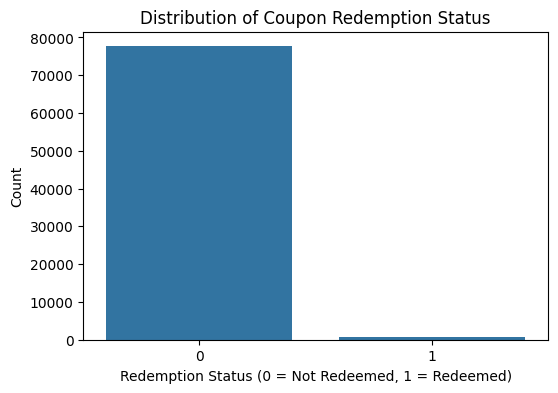

Redemption Status Counts:
 redemption_status
0    77640
1      729
Name: count, dtype: int64

Redemption Status Percentage:
 redemption_status
0    99.069785
1     0.930215
Name: proportion, dtype: float64


In [9]:
#Target Variable Analysis ('redemption_status') ---
plt.figure(figsize=(6, 4))
sns.countplot(x='redemption_status', data=train_eda_df)
plt.title('Distribution of Coupon Redemption Status')
plt.xlabel('Redemption Status (0 = Not Redeemed, 1 = Redeemed)')
plt.ylabel('Count')
plt.show()

redemption_counts = train_eda_df['redemption_status'].value_counts()
redemption_percentage = train_eda_df['redemption_status'].value_counts(normalize=True) * 100
print("Redemption Status Counts:\n", redemption_counts)
print("\nRedemption Status Percentage:\n", redemption_percentage)

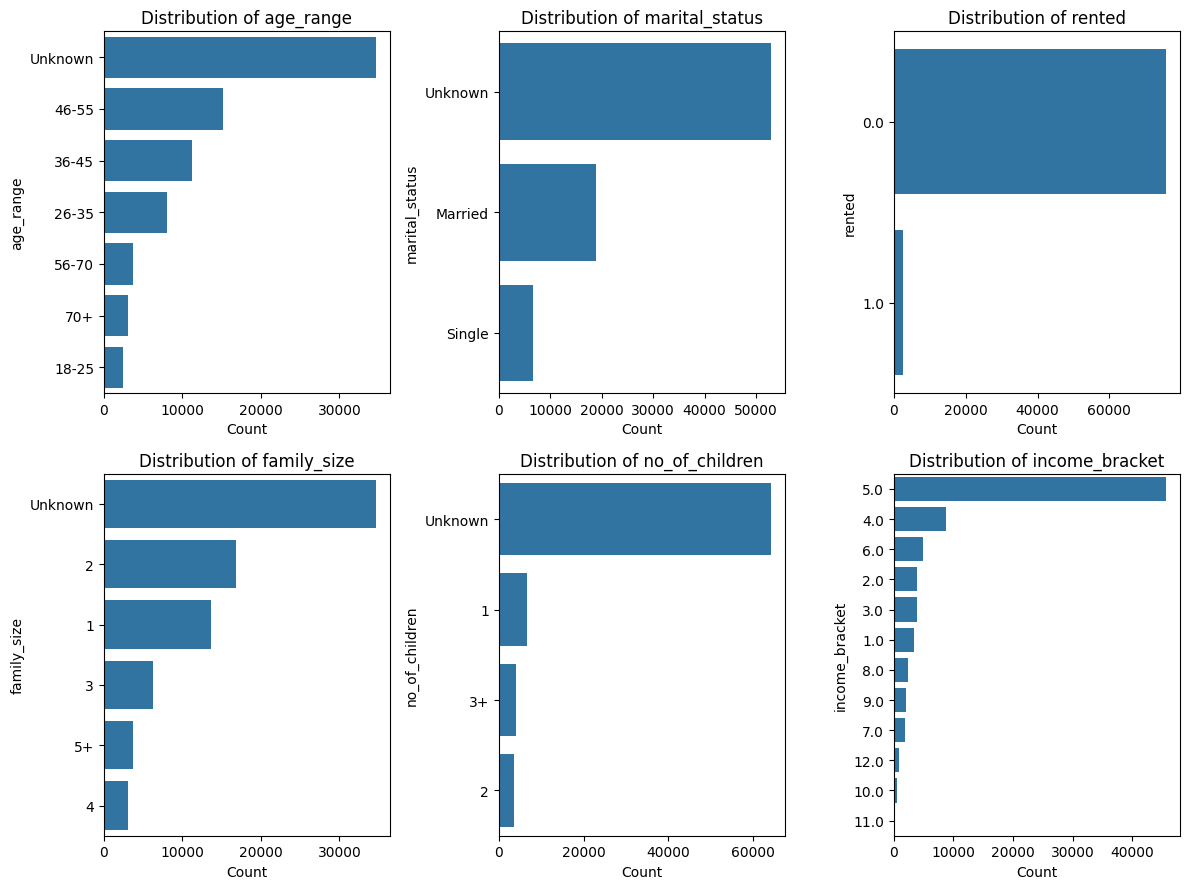


 Value Counts for Demographic Features

age_range:
age_range
Unknown    34708
46-55      15154
36-45      11210
26-35       8024
56-70       3723
70+         3094
18-25       2456
Name: count, dtype: int64

marital_status:
marital_status
Unknown    52975
Married    18811
Single      6583
Name: count, dtype: int64

rented:
rented
0.0    75864
1.0     2505
Name: count, dtype: int64

family_size:
family_size
Unknown    34708
2          16888
1          13612
3           6267
5+          3755
4           3139
Name: count, dtype: int64

no_of_children:
no_of_children
Unknown    64313
1           6540
3+          3969
2           3547
Name: count, dtype: int64

income_bracket:
income_bracket
5.0     45745
4.0      8753
6.0      4855
2.0      3892
3.0      3882
1.0      3456
8.0      2369
9.0      2019
7.0      1829
12.0      796
10.0      513
11.0      260
Name: count, dtype: int64


In [11]:
# Univariate Analysis: Customer Demographics
demographic_features = ['age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket']

plt.figure(figsize=(12, 9))
for i, col in enumerate(demographic_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train_eda_df, y=col, order=train_eda_df[col].value_counts().index) # Use y for horizontal bars if many categories
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n Value Counts for Demographic Features")
for col in demographic_features:
    print(f"\n{col}:")
    print(train_eda_df[col].value_counts(dropna=False))

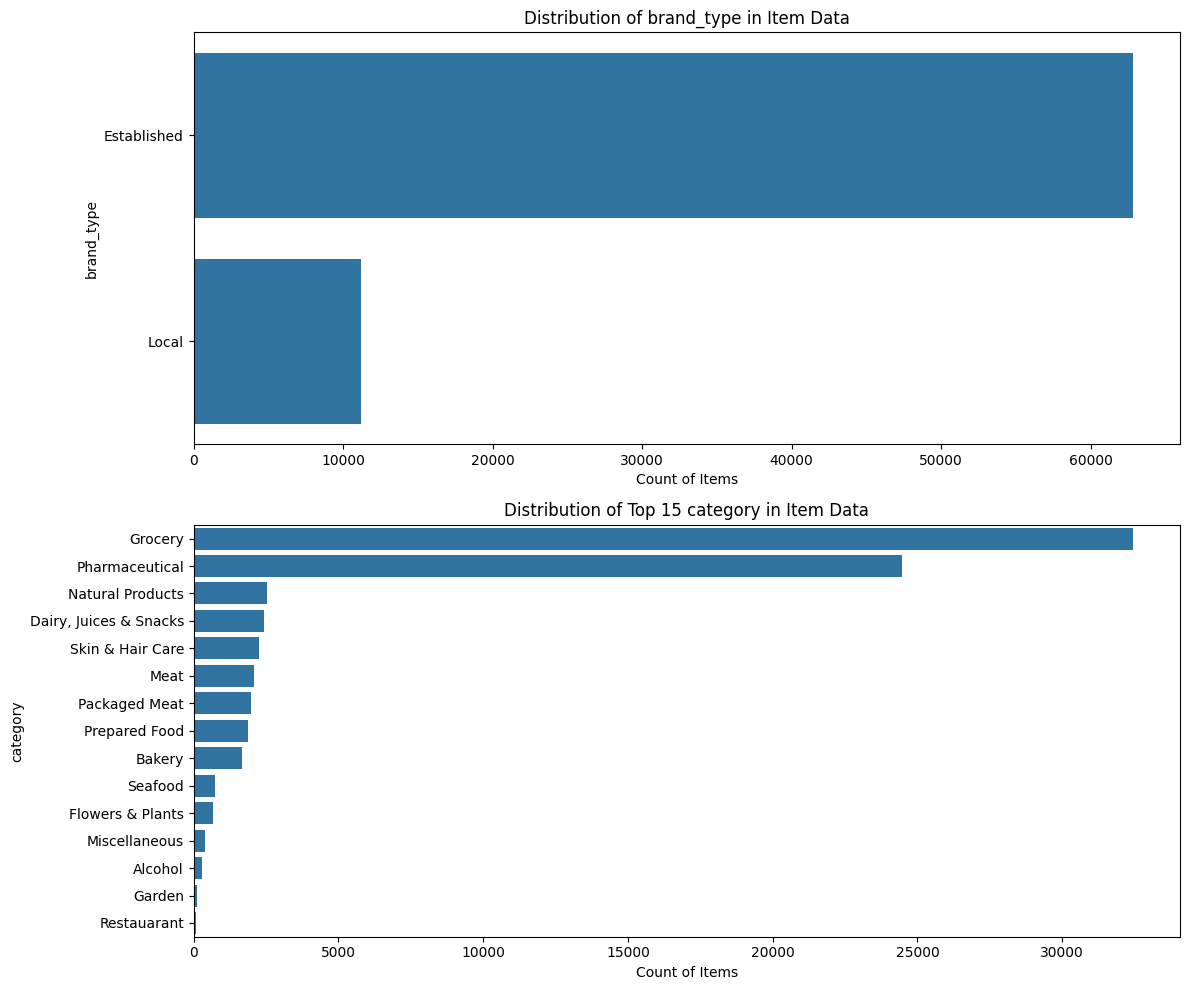


--- Value Counts for Item Features ---

brand_type:
brand_type
Established    62842
Local          11224
Name: count, dtype: int64

category:
category
Grocery                   32448
Pharmaceutical            24471
Natural Products           2533
Dairy, Juices & Snacks     2425
Skin & Hair Care           2244
Meat                       2080
Packaged Meat              1966
Prepared Food              1880
Bakery                     1679
Seafood                     728
Flowers & Plants            664
Miscellaneous               385
Alcohol                     303
Garden                      102
Restauarant                  78
Salads                       40
Travel                       19
Fuel                         14
Vegetables (cut)              7
Name: count, dtype: int64

Number of unique brands: 5528
Top 10 brands:
 brand
56      10480
686      1142
1        1091
4700      923
1262      906
487       735
619       717
946       626
4467      607
1124      594
Name: count, dtype: i

In [12]:
# Univariate Analysis: Item Features (from item_data_df) ---
item_features_to_plot = ['brand_type', 'category']

plt.figure(figsize=(12, 10)) # Increased figure size
for i, col in enumerate(item_features_to_plot):
    plt.subplot(2, 1, i + 1)
    # For 'category', which might have many unique values, let's plot top N
    if item_data_df[col].nunique() > 15:
        top_n = 15
        order = item_data_df[col].value_counts().nlargest(top_n).index
        sns.countplot(data=item_data_df, y=col, order=order)
        plt.title(f'Distribution of Top {top_n} {col} in Item Data')
    else:
        sns.countplot(data=item_data_df, y=col, order=item_data_df[col].value_counts().index)
        plt.title(f'Distribution of {col} in Item Data')
    plt.xlabel('Count of Items')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

print("\n--- Value Counts for Item Features ---")
for col in item_features_to_plot:
    print(f"\n{col}:")
    print(item_data_df[col].value_counts())

# Brand has many unique values, so we'll just print its nunique and some top counts
print(f"\nNumber of unique brands: {item_data_df['brand'].nunique()}")
print("Top 10 brands:\n", item_data_df['brand'].value_counts().head(10))

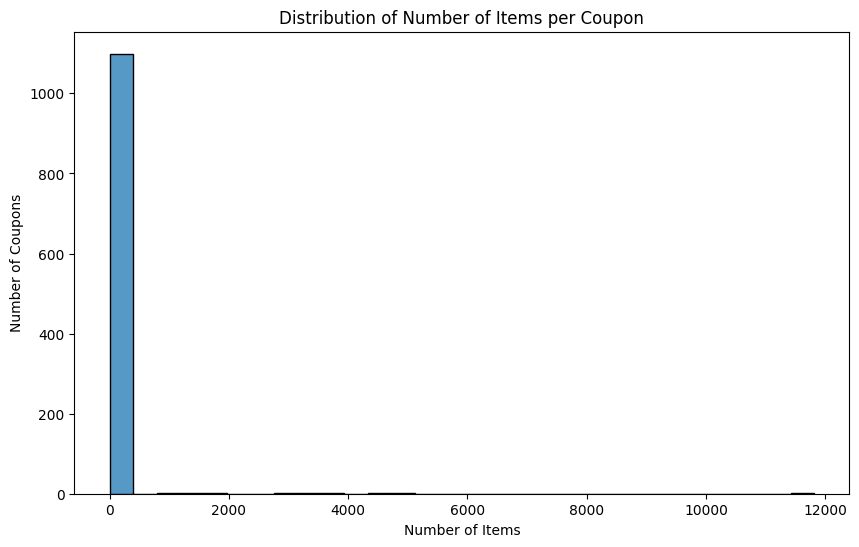

count     1116.000000
mean        83.031362
std        633.143339
min          1.000000
25%          5.000000
50%         10.000000
75%         24.000000
max      11814.000000
Name: item_id, dtype: float64


In [13]:
# Univariate Analysis: Coupon-Item Mapping ---
# Number of items per coupon
items_per_coupon = coupon_item_mapping_df.groupby('coupon_id')['item_id'].count()

plt.figure(figsize=(10, 6))
sns.histplot(items_per_coupon, bins=30, kde=False) # KDE might be less meaningful for counts
plt.title('Distribution of Number of Items per Coupon')
plt.xlabel('Number of Items')
plt.ylabel('Number of Coupons')
plt.show()
print(items_per_coupon.describe())

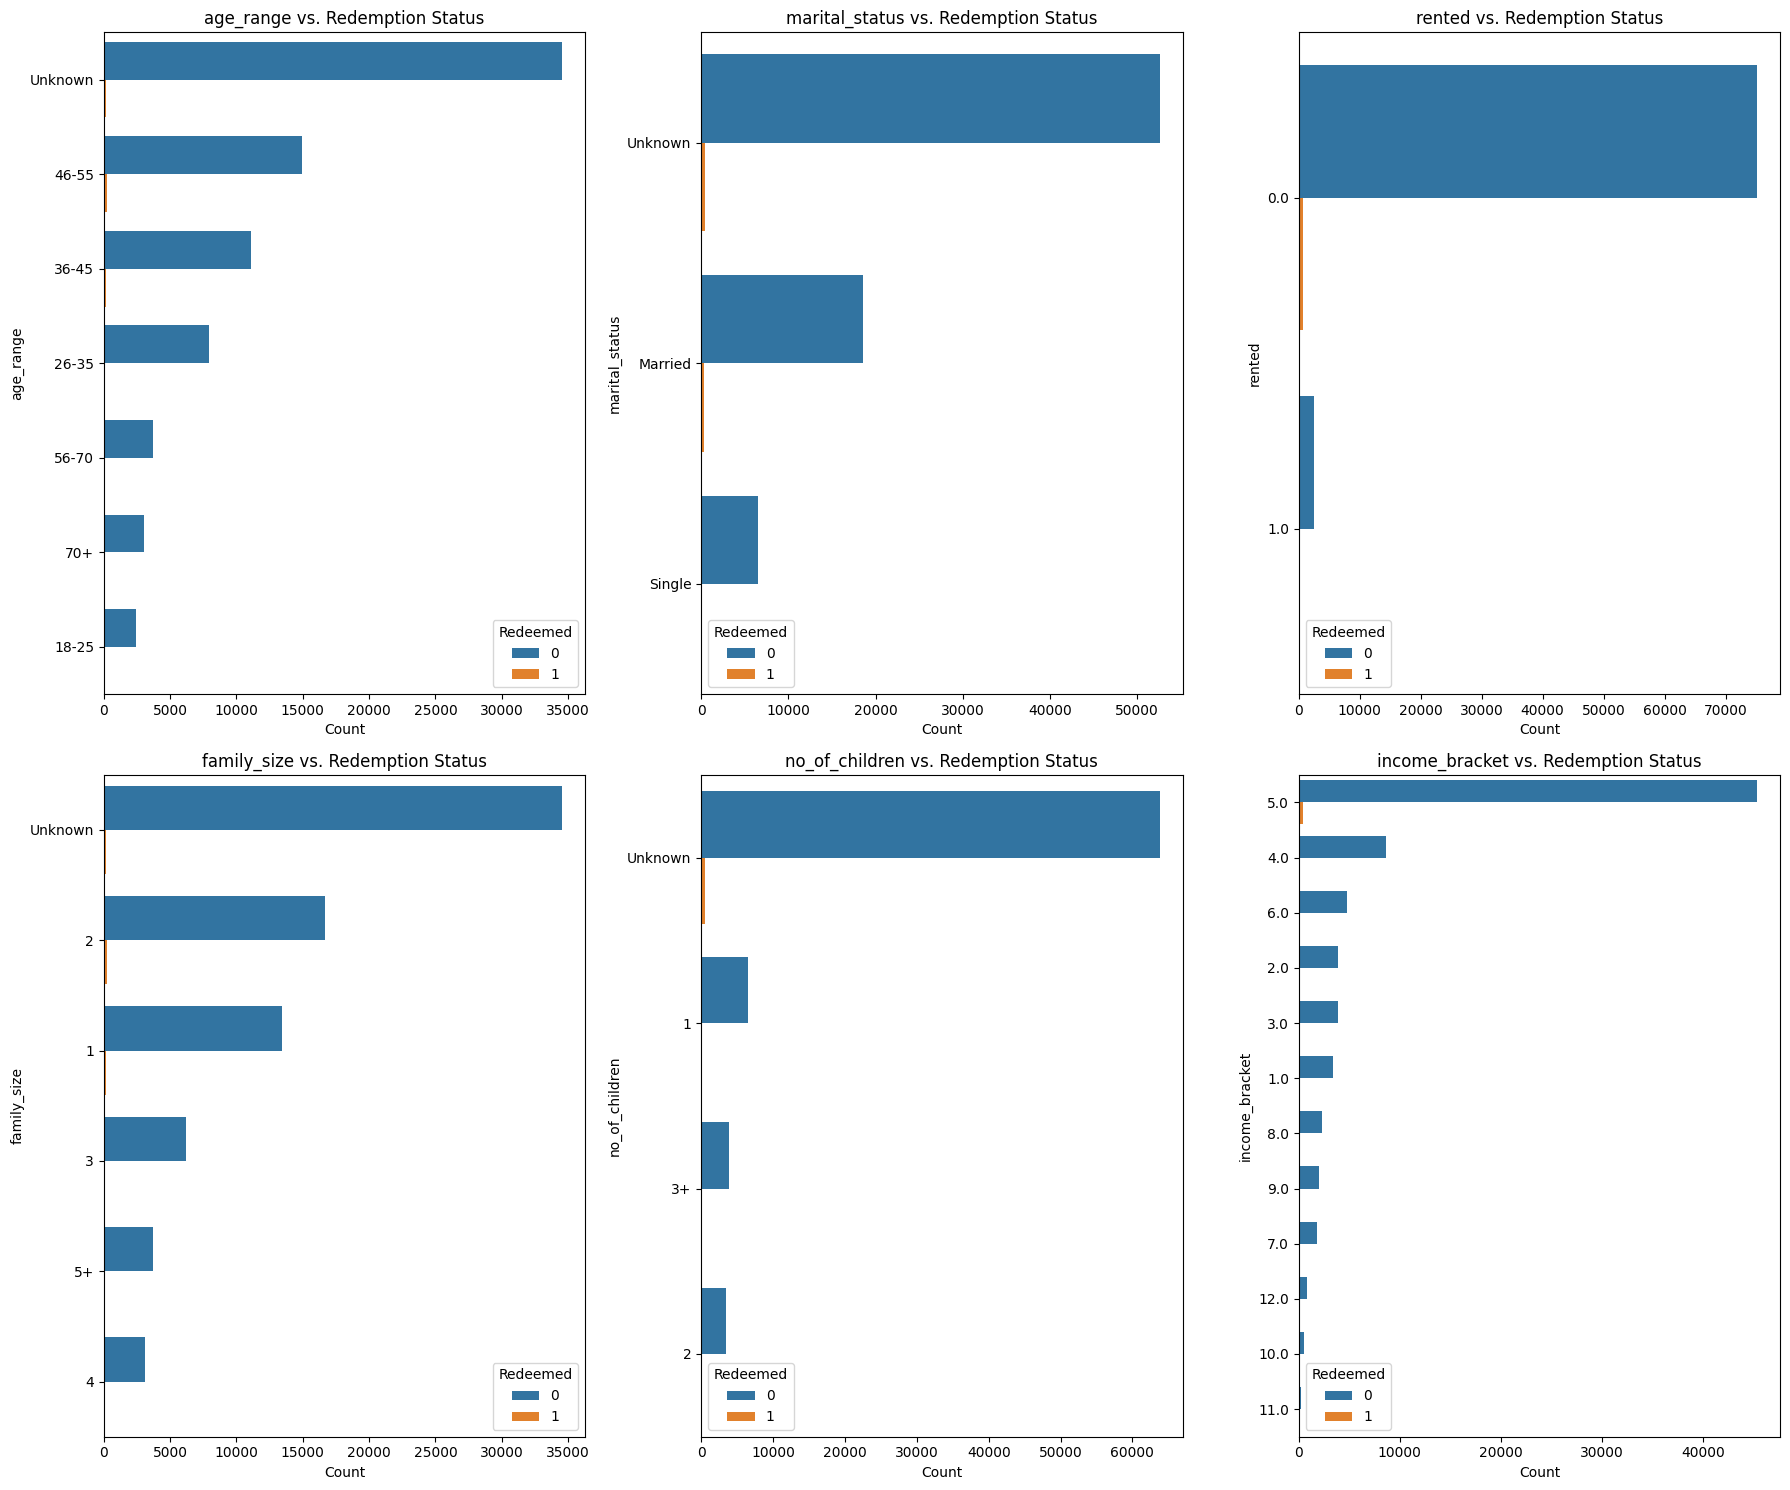


--- Redemption Rate by Demographic Categories ---

Redemption Rate for age_range:
 redemption_status         1
age_range                  
46-55              1.445163
26-35              1.358425
36-45              1.329170
56-70              1.316143
70+                0.872657
18-25              0.610749
Unknown            0.463870

Redemption Rate for marital_status:
 redemption_status         1
marital_status             
Married            1.488491
Single             1.184870
Unknown            0.700330

Redemption Rate for rented:
 redemption_status         1
rented                     
1.0                1.157685
0.0                0.922704

Redemption Rate for family_size:
 redemption_status         1
family_size                
4                  1.943294
5+                 1.544607
2                  1.284936
1                  1.248898
3                  0.989309
Unknown            0.463870

Redemption Rate for no_of_children:
 redemption_status         1
no_of_children     

In [14]:
#  Bivariate Analysis: Demographics vs. Redemption Status ---
plt.figure(figsize=(18, 15)) # Adjusted figure size
for i, col in enumerate(demographic_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=train_eda_df, y=col, hue='redemption_status', order=train_eda_df[col].value_counts().index)
    plt.title(f'{col} vs. Redemption Status')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.legend(title='Redeemed')
plt.tight_layout()
plt.show()

# --- Normalized view for redemption rate by category ---
print("\n--- Redemption Rate by Demographic Categories ---")
for col in demographic_features:
    # Group by the demographic column and then redemption_status, then unstack for easy rate calculation
    grouped = train_eda_df.groupby(col)['redemption_status'].value_counts(normalize=True).mul(100).unstack(fill_value=0)
    if 1 in grouped.columns : # Check if redemption status 1 exists for this group
         print(f"\nRedemption Rate for {col}:\n", grouped[[1]].sort_values(by=1, ascending=False))
    else:
        print(f"\nNo redemptions recorded for any category in {col}")


--- customer_transaction_data_df describe ---
           quantity  selling_price  other_discount  coupon_discount
count  1.324566e+06   1.324566e+06    1.324566e+06     1.324566e+06
mean   1.306633e+02   1.146036e+02   -1.776871e+01    -5.948983e-01
std    1.311545e+03   1.529053e+02    3.788867e+01     7.069367e+00
min    1.000000e+00   3.600000e-01   -3.120310e+03    -1.992230e+03
25%    1.000000e+00   4.916000e+01   -2.315000e+01     0.000000e+00
50%    1.000000e+00   7.801000e+01   -1.780000e+00     0.000000e+00
75%    1.000000e+00   1.243100e+02    0.000000e+00     0.000000e+00
max    8.963800e+04   1.780964e+04    0.000000e+00     0.000000e+00


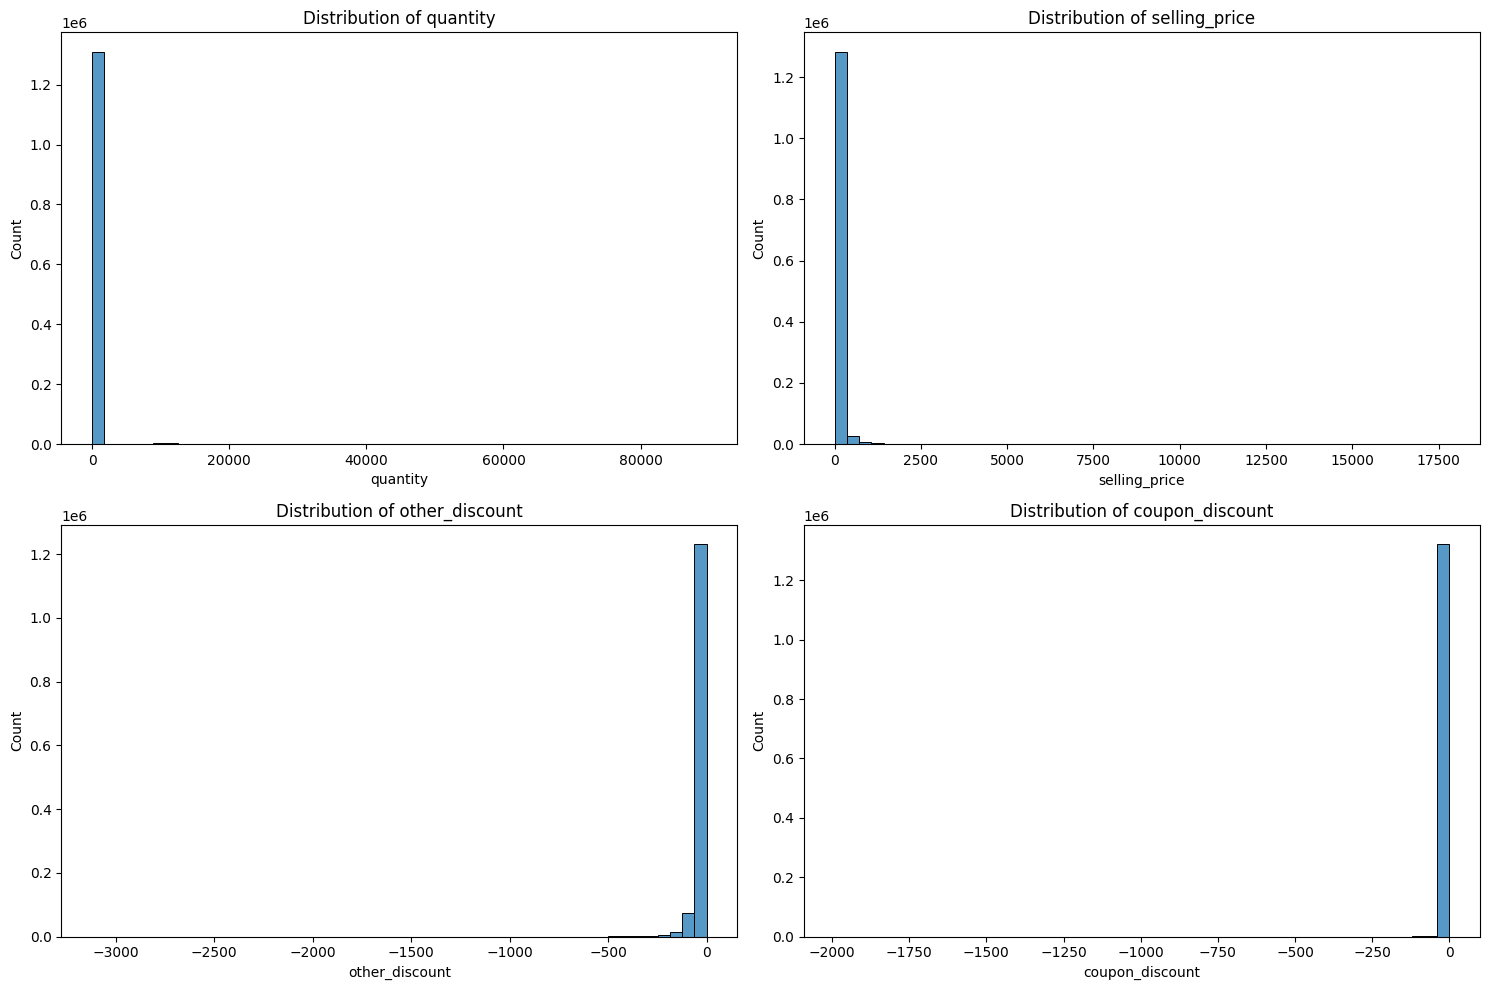

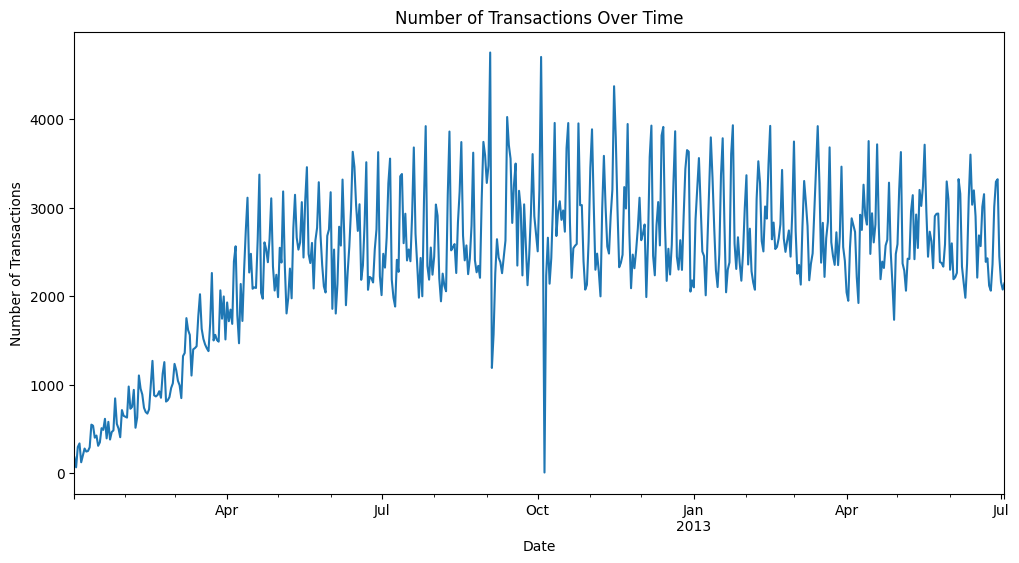


Number of transactions with coupon_discount > 0 (i.e., coupon used): 21286
       selling_price  other_discount  coupon_discount
count   21286.000000    21286.000000     21286.000000
mean      147.680958      -38.224872       -37.018796
std       190.910064       82.280889        41.971056
min         1.070000    -3097.870000     -1992.230000
25%        63.760000      -42.030000       -35.620000
50%        97.600000      -17.450000       -26.710000
75%       160.290000        0.000000       -17.810000
max      6270.190000        0.000000        -3.560000

Sample of coupon_discount values:
589588      0.00
1162880     0.00
542129      0.00
1172130     0.00
984527      0.00
441109      0.00
1023700     0.00
1308585     0.00
648054    -17.81
203476      0.00
Name: coupon_discount, dtype: float64
Min coupon_discount: -1992.23
Max coupon_discount: 0.0

Number of transactions where coupon_discount < 0 (actual redemptions in transaction log): 21286


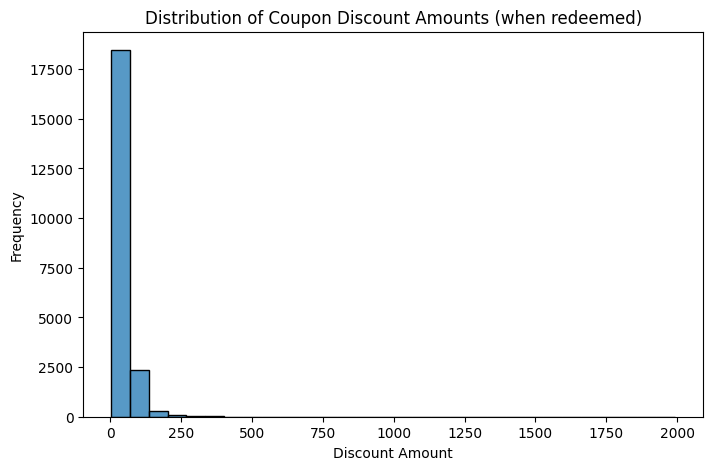

In [16]:
# --- EDA on Customer Transaction Data ---
print("\n--- customer_transaction_data_df describe ---")
print(customer_transaction_data_df[['quantity', 'selling_price', 'other_discount', 'coupon_discount']].describe())

# Distribution of key numerical fields
transaction_numerical_cols = ['quantity', 'selling_price', 'other_discount', 'coupon_discount']
plt.figure(figsize=(15, 10))
for i, col in enumerate(transaction_numerical_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(customer_transaction_data_df[col], bins=50, kde=False) # Using more bins, KDE might be slow for large data
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Transactions over time
transactions_over_time = customer_transaction_data_df.groupby('date')['item_id'].count()
plt.figure(figsize=(12, 6))
transactions_over_time.plot()
plt.title('Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Focus on transactions where a coupon was actually used (inferred from coupon_discount > 0)
redeemed_transactions = customer_transaction_data_df[customer_transaction_data_df['coupon_discount'] < 0] # Discounts are negative
print(f"\nNumber of transactions with coupon_discount > 0 (i.e., coupon used): {len(redeemed_transactions)}")
if not redeemed_transactions.empty:
    print(redeemed_transactions[['selling_price', 'other_discount', 'coupon_discount']].describe())
else:
    print("No transactions found with coupon_discount > 0. Check data definition; discounts might be negative.")

# verification of the sign of discounts
print("\nSample of coupon_discount values:")
print(customer_transaction_data_df['coupon_discount'].sample(10))
print(f"Min coupon_discount: {customer_transaction_data_df['coupon_discount'].min()}")
print(f"Max coupon_discount: {customer_transaction_data_df['coupon_discount'].max()}")


actual_coupon_redemptions_in_transactions = customer_transaction_data_df[customer_transaction_data_df['coupon_discount'] < 0]
print(f"\nNumber of transactions where coupon_discount < 0 (actual redemptions in transaction log): {len(actual_coupon_redemptions_in_transactions)}")
if not actual_coupon_redemptions_in_transactions.empty:
    plt.figure(figsize=(8,5))
    sns.histplot(-actual_coupon_redemptions_in_transactions['coupon_discount'], bins=30) # Plotting absolute discount value
    plt.title('Distribution of Coupon Discount Amounts (when redeemed)')
    plt.xlabel('Discount Amount')
    plt.ylabel('Frequency')
    plt.show()

#FEATURE ENGINEERING

In [17]:
#Merging testing and training datasets
# Create a copy to avoid modifying original dataframes if you need to rerun cells
train_df_fe = train_df.copy()
test_df_fe = test_df.copy()
campaign_data_df_fe = campaign_data_df.copy()
customer_demographics_df_fe = customer_demographics_df.copy()
coupon_item_mapping_df_fe = coupon_item_mapping_df.copy()
item_data_df_fe = item_data_df.copy()
customer_transaction_data_df_fe = customer_transaction_data_df.copy()


# Adding a 'source' column to distinguish between train and test
train_df_fe['source'] = 'train'
test_df_fe['source'] = 'test'

# The test set doesn't have 'redemption_status', so add it with a placeholder (e.g., NaN)
# before concatenating if you want to keep all columns aligned.
# For feature engineering based on input features, it's often not strictly needed in the test part yet.
test_df_fe['redemption_status'] = -1 # Or np.nan, depends on how you handle it later

# Concatenate train and test data
combined_df = pd.concat([train_df_fe, test_df_fe], ignore_index=True, sort=False)

In [18]:
# Ensure date columns are in datetime format (they should be from EDA)
campaign_data_df_fe['start_date'] = pd.to_datetime(campaign_data_df_fe['start_date'])
campaign_data_df_fe['end_date'] = pd.to_datetime(campaign_data_df_fe['end_date'])

# Merge with campaign data
combined_df = pd.merge(combined_df, campaign_data_df_fe, on='campaign_id', how='left')

# 1. Campaign Duration
combined_df['campaign_duration'] = (combined_df['end_date'] - combined_df['start_date']).dt.days

# 2. Date-based features from campaign start_date
combined_df['campaign_start_year'] = combined_df['start_date'].dt.year
combined_df['campaign_start_month'] = combined_df['start_date'].dt.month
combined_df['campaign_start_day'] = combined_df['start_date'].dt.day
combined_df['campaign_start_dayofweek'] = combined_df['start_date'].dt.dayofweek # Monday=0, Sunday=6
combined_df['campaign_start_weekofyear'] = combined_df['start_date'].dt.isocalendar().week.astype(int)
combined_df['campaign_start_quarter'] = combined_df['start_date'].dt.quarter


combined_df['campaign_end_month'] = combined_df['end_date'].dt.month


In [19]:
# 1. Number of items per coupon
items_per_coupon = coupon_item_mapping_df_fe.groupby('coupon_id')['item_id'].count().reset_index(name='num_items_per_coupon')
combined_df = pd.merge(combined_df, items_per_coupon, on='coupon_id', how='left')
combined_df['num_items_per_coupon'].fillna(0, inplace=True) # If a coupon_id is not in mapping

# 2. Features from items linked to the coupon (requires item_data_df)
# First, merge coupon_item_mapping with item_data
coupon_item_details_df = pd.merge(coupon_item_mapping_df_fe, item_data_df_fe, on='item_id', how='left')

# Example: Dominant category for a coupon
#  group by coupon_id, find mode of category
dominant_category_per_coupon = coupon_item_details_df.groupby('coupon_id')['category'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index(name='dominant_coupon_category')
combined_df = pd.merge(combined_df, dominant_category_per_coupon, on='coupon_id', how='left')
combined_df['dominant_coupon_category'].fillna('Unknown', inplace=True)


# Example: Number of unique categories for items under a coupon (diversity)
num_unique_categories_per_coupon = coupon_item_details_df.groupby('coupon_id')['category'].nunique().reset_index(name='num_unique_categories_coupon')
combined_df = pd.merge(combined_df, num_unique_categories_per_coupon, on='coupon_id', how='left')
combined_df['num_unique_categories_coupon'].fillna(0, inplace=True)

# Example: Dominant brand_type for a coupon
dominant_brand_type_per_coupon = coupon_item_details_df.groupby('coupon_id')['brand_type'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'Unknown').reset_index(name='dominant_coupon_brand_type')
combined_df = pd.merge(combined_df, dominant_brand_type_per_coupon, on='coupon_id', how='left')
combined_df['dominant_coupon_brand_type'].fillna('Unknown', inplace=True)

# Example: Average selling price of items linked to a coupon
# This is trickier as item_data itself doesn't have price.
# Price is in customer_transaction_data. We'd first need a representative price for each item.
# Let's calculate median selling_price for each item from transaction history.
median_item_price = customer_transaction_data_df_fe.groupby('item_id')['selling_price'].median().reset_index(name='median_item_selling_price')

# Merge this median price into coupon_item_details
coupon_item_details_df = pd.merge(coupon_item_details_df, median_item_price, on='item_id', how='left')

# Now, calculate the average of these median prices for items under each coupon
avg_median_price_per_coupon = coupon_item_details_df.groupby('coupon_id')['median_item_selling_price'].mean().reset_index(name='avg_median_item_price_coupon')
combined_df = pd.merge(combined_df, avg_median_price_per_coupon, on='coupon_id', how='left')
# Fill missing avg_median_item_price_coupon with overall median of medians, or 0, or mean
combined_df['avg_median_item_price_coupon'].fillna(combined_df['avg_median_item_price_coupon'].median(), inplace=True)

<ipython-input-19-07583bd0b915>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['num_items_per_coupon'].fillna(0, inplace=True) # If a coupon_id is not in mapping
<ipython-input-19-07583bd0b915>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [20]:
# Merge with customer demographics data
combined_df = pd.merge(combined_df, customer_demographics_df_fe, on='customer_id', how='left')

demographic_cols = ['age_range', 'marital_status', 'rented', 'family_size', 'no_of_children', 'income_bracket']

for col in ['age_range', 'marital_status', 'family_size', 'no_of_children']:
    combined_df[col].fillna('Unknown', inplace=True)

if 'rented' in combined_df.columns: # Check if column exists, as it might be all NaN if not in any customer
    rented_mode = combined_df['rented'].mode()
    if not rented_mode.empty:
        combined_df['rented'].fillna(rented_mode[0], inplace=True)
    else:
        combined_df['rented'].fillna(0, inplace=True) # Fallback if all are NaN

if 'income_bracket' in combined_df.columns:
    income_median = combined_df['income_bracket'].median()
    if pd.notna(income_median):
        combined_df['income_bracket'].fillna(income_median, inplace=True)
    else: # Fallback if all are NaN initially (e.g. if customer_demographics was empty)
        combined_df['income_bracket'].fillna(0, inplace=True) # Or some other sensible default



<ipython-input-20-172f650b4086>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df[col].fillna('Unknown', inplace=True)
<ipython-input-20-172f650b4086>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [21]:
1+1

2

In [22]:
# Ensure 'date' in transaction data is datetime
customer_transaction_data_df_fe['date'] = pd.to_datetime(customer_transaction_data_df_fe['date'])

# Ensure 'start_date' in combined_df is datetime (should be already)
combined_df['start_date'] = pd.to_datetime(combined_df['start_date'])

In [23]:
customer_campaign_interactions = combined_df[['customer_id', 'start_date', 'id']].copy()
customer_campaign_interactions = customer_campaign_interactions.sort_values(['customer_id', 'start_date'])

# Sort transactions by customer and date
customer_transaction_data_df_fe = customer_transaction_data_df_fe.sort_values(['customer_id', 'date'])

In [28]:
# Initialize lists to store the calculated features
historical_total_transactions_list = []
historical_total_spend_list = []
historical_avg_spend_list = []
historical_total_quantity_list = []
historical_unique_items_purchased_list = []
historical_days_since_last_purchase_list = []
historical_total_coupon_discount_availed_list = [] # From coupon_discount column
historical_coupon_redemptions_count_list = [] # Count of transactions where coupon_discount was used

# We'll also track the 'id' from combined_df to merge these features back
interaction_ids_list = []

# Group transactions by customer for efficient lookup
grouped_transactions = customer_transaction_data_df_fe.groupby('customer_id')

# Iterate through each unique customer in our combined_df to process their campaign interactions
for customer_id, group in customer_campaign_interactions.groupby('customer_id'):
    try:
        customer_transactions = grouped_transactions.get_group(customer_id)
    except KeyError:
        # This customer has no transactions in the transaction log
        # So, for all their interactions, historical features will be 0 or NaN (like recency)
        for _, row in group.iterrows():
            interaction_ids_list.append(row['id'])
            historical_total_transactions_list.append(0)
            historical_total_spend_list.append(0)
            historical_avg_spend_list.append(0)
            historical_total_quantity_list.append(0)
            historical_unique_items_purchased_list.append(0)
            historical_days_since_last_purchase_list.append(np.nan) # No last purchase
            historical_total_coupon_discount_availed_list.append(0)
            historical_coupon_redemptions_count_list.append(0)
        continue # Move to the next customer

    # Sort transactions by date for this customer (should already be sorted but good practice)
    customer_transactions = customer_transactions.sort_values('date')

    # Iterate through each campaign interaction for this customer
    for _, interaction_row in group.iterrows():
        campaign_start_date = interaction_row['start_date']
        interaction_id = interaction_row['id']

        interaction_ids_list.append(interaction_id)

        # Filter transactions before the current campaign_start_date
        past_transactions = customer_transactions[customer_transactions['date'] < campaign_start_date]

        if past_transactions.empty:
            historical_total_transactions_list.append(0)
            historical_total_spend_list.append(0)
            historical_avg_spend_list.append(0)
            historical_total_quantity_list.append(0)
            historical_unique_items_purchased_list.append(0)
            historical_days_since_last_purchase_list.append(np.nan)
            historical_total_coupon_discount_availed_list.append(0)
            historical_coupon_redemptions_count_list.append(0)

        else: # if past_transactions is NOT empty
                historical_total_transactions_list.append(len(past_transactions))
                historical_total_spend_list.append(past_transactions['selling_price'].sum())
                historical_avg_spend_list.append(past_transactions['selling_price'].mean())
                historical_total_quantity_list.append(past_transactions['quantity'].sum())
                historical_unique_items_purchased_list.append(past_transactions['item_id'].nunique())

                days_since_last_purchase = (campaign_start_date - past_transactions['date'].max()).days
                historical_days_since_last_purchase_list.append(days_since_last_purchase)

                # Define coupon_applied_transactions once based on your sign convention
                # Assuming negative coupon_discount values mean a discount was applied
                coupon_applied_transactions = past_transactions[past_transactions['coupon_discount'] < 0]

                # Calculate and append ONCE
                # If coupon_discount is negative, sum() will be negative, so *-1 makes it a positive total discount.
                # If coupon_discount is positive for discounts, then just sum() and no *-1.
                # Your original code used 'coupon_discount < 0' and 'sum() * -1', let's stick to that logic:

                current_total_coupon_discount = coupon_applied_transactions['coupon_discount'].sum() * -1
                historical_total_coupon_discount_availed_list.append(current_total_coupon_discount)
                historical_coupon_redemptions_count_list.append(len(coupon_applied_transactions))

In [29]:
print(f"Length of interaction_ids_list: {len(interaction_ids_list)}")
print(f"Length of historical_total_transactions_list: {len(historical_total_transactions_list)}")
print(f"Length of historical_total_spend_list: {len(historical_total_spend_list)}") # You were populating this list
print(f"Length of historical_avg_spend_list: {len(historical_avg_spend_list)}")
print(f"Length of historical_total_quantity_list: {len(historical_total_quantity_list)}")
print(f"Length of historical_unique_items_purchased_list: {len(historical_unique_items_purchased_list)}")
print(f"Length of historical_days_since_last_purchase_list: {len(historical_days_since_last_purchase_list)}")
print(f"Length of historical_total_coupon_discount_availed_list: {len(historical_total_coupon_discount_availed_list)}")
print(f"Length of historical_coupon_redemptions_count_list: {len(historical_coupon_redemptions_count_list)}")

Length of interaction_ids_list: 128595
Length of historical_total_transactions_list: 128595
Length of historical_total_spend_list: 128595
Length of historical_avg_spend_list: 128595
Length of historical_total_quantity_list: 128595
Length of historical_unique_items_purchased_list: 128595
Length of historical_days_since_last_purchase_list: 128595
Length of historical_total_coupon_discount_availed_list: 128595
Length of historical_coupon_redemptions_count_list: 128595


In [30]:
# Create a DataFrame from the lists
historical_features_df = pd.DataFrame({
    'id': interaction_ids_list,
    'cust_hist_total_transactions': historical_total_transactions_list,
    'cust_hist_total_spend': historical_total_spend_list,
    'cust_hist_avg_spend': historical_avg_spend_list,
    'cust_hist_total_quantity': historical_total_quantity_list,
    'cust_hist_unique_items': historical_unique_items_purchased_list,
    'cust_hist_days_since_last_purchase': historical_days_since_last_purchase_list,
    'cust_hist_total_coupon_discount': historical_total_coupon_discount_availed_list,
    'cust_hist_coupon_redemptions': historical_coupon_redemptions_count_list
})

# Merge these features back into combined_df
combined_df = pd.merge(combined_df, historical_features_df, on='id', how='left')

# Fill NaNs that might arise from calculations (e.g., avg_spend for 0 transactions, days_since_last_purchase for new customers)
combined_df['cust_hist_avg_spend'].fillna(0, inplace=True)
# For days_since_last_purchase, NaN means no prior purchase. A large value or a separate indicator could be used.
# Let's fill with a large value (e.g., 9999) to signify very long ago or never.
combined_df['cust_hist_days_since_last_purchase'].fillna(99999, inplace=True)

# Feature: Customer historical coupon redemption rate
combined_df['cust_hist_coupon_redemption_rate'] = (combined_df['cust_hist_coupon_redemptions'] / combined_df['cust_hist_total_transactions']).fillna(0)
# Handle division by zero if cust_hist_total_transactions is 0
combined_df.loc[combined_df['cust_hist_total_transactions'] == 0, 'cust_hist_coupon_redemption_rate'] = 0

<ipython-input-30-2bd18bfab9da>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_df['cust_hist_avg_spend'].fillna(0, inplace=True)
<ipython-input-30-2bd18bfab9da>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [31]:


# Feature 1: Customer's historical interaction with the coupon's dominant category ---

# Initialize lists for the new features
cust_has_purchased_in_coupon_category_list = []
cust_txns_in_coupon_category_list = []
cust_spend_in_coupon_category_list = []
# Using the same interaction_ids_list for mapping, assuming its order matches combined_df
# or re-fetch if necessary. For simplicity, let's assume we can map using 'id' later.
# We'll build a temporary df and merge.

interaction_ids_for_cat_interaction = [] # To ensure correct mapping

# Group transactions by customer for efficient lookup
# grouped_transactions was already created: customer_transaction_data_df_fe.groupby('customer_id')

# Merge item category to transactions for easier filtering
transactions_with_category = pd.merge(customer_transaction_data_df_fe,
                                      item_data_df_fe[['item_id', 'category']],
                                      on='item_id',
                                      how='left')
transactions_with_category['category'].fillna('Unknown', inplace=True) # Handle items not in item_data

# Re-group after adding category
grouped_transactions_with_cat = transactions_with_category.groupby('customer_id')


# Iterate through each interaction in combined_df
# We need 'customer_id', 'start_date', 'dominant_coupon_category', and 'id' from combined_df
for index, interaction_row in combined_df.iterrows():
    customer_id = interaction_row['customer_id']
    campaign_start_date = interaction_row['start_date']
    coupon_category = interaction_row['dominant_coupon_category']
    interaction_id = interaction_row['id'] # The unique id for each row in combined_df

    interaction_ids_for_cat_interaction.append(interaction_id)

    has_purchased_flag = 0
    num_txns_in_cat = 0
    spend_in_cat = 0.0

    if coupon_category != 'Unknown': # Only proceed if the coupon has a known dominant category
        try:
            customer_transactions_with_cat = grouped_transactions_with_cat.get_group(customer_id)

            # Filter transactions before the current campaign_start_date
            past_transactions_with_cat = customer_transactions_with_cat[
                customer_transactions_with_cat['date'] < campaign_start_date
            ]

            if not past_transactions_with_cat.empty:
                # Filter past transactions for those matching the coupon's dominant category
                relevant_category_txns = past_transactions_with_cat[
                    past_transactions_with_cat['category'] == coupon_category
                ]

                if not relevant_category_txns.empty:
                    has_purchased_flag = 1
                    num_txns_in_cat = len(relevant_category_txns)
                    spend_in_cat = relevant_category_txns['selling_price'].sum()
        except KeyError:
            # Customer has no transactions at all, so all interaction features are 0/default
            pass # Defaults (0) assigned before try will be used

    cust_has_purchased_in_coupon_category_list.append(has_purchased_flag)
    cust_txns_in_coupon_category_list.append(num_txns_in_cat)
    cust_spend_in_coupon_category_list.append(spend_in_cat)

# Create a DataFrame for these new interaction features
customer_coupon_cat_interaction_df = pd.DataFrame({
    'id': interaction_ids_for_cat_interaction, # This 'id' links back to combined_df's unique row id
    'cust_has_purchased_coupon_cat': cust_has_purchased_in_coupon_category_list,
    'cust_hist_txns_coupon_cat': cust_txns_in_coupon_category_list,
    'cust_hist_spend_coupon_cat': cust_spend_in_coupon_category_list
})

# Merge these new features back into combined_df
combined_df = pd.merge(combined_df, customer_coupon_cat_interaction_df, on='id', how='left')

# Sanity check for NaNs or issues after merge (should be none if 'id' is a perfect key)
print("Missing values in new customer-coupon category interaction features:")
print(combined_df[['cust_has_purchased_coupon_cat', 'cust_hist_txns_coupon_cat', 'cust_hist_spend_coupon_cat']].isnull().sum())

<ipython-input-31-d6969dff2fa0>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_with_category['category'].fillna('Unknown', inplace=True) # Handle items not in item_data


Missing values in new customer-coupon category interaction features:
cust_has_purchased_coupon_cat    0
cust_hist_txns_coupon_cat        0
cust_hist_spend_coupon_cat       0
dtype: int64


In [32]:
print("--- Missing Values Before Final Imputation ---")
missing_values = combined_df.isnull().sum()
print(missing_values[missing_values > 0]) # Show only columns with missing values
print(f"\nTotal missing values: {missing_values.sum()}")

# Review data types as well, to ensure they are as expected
print("\n--- Data Types ---")
print(combined_df.dtypes)

--- Missing Values Before Final Imputation ---
Series([], dtype: int64)

Total missing values: 0

--- Data Types ---
id                                             int64
campaign_id                                    int64
coupon_id                                      int64
customer_id                                    int64
redemption_status                              int64
source                                        object
campaign_type                                 object
start_date                            datetime64[ns]
end_date                              datetime64[ns]
campaign_duration                              int64
campaign_start_year                            int32
campaign_start_month                           int32
campaign_start_day                             int32
campaign_start_dayofweek                       int32
campaign_start_weekofyear                      int64
campaign_start_quarter                         int32
campaign_end_month                 

In [33]:

categorical_cols = [
    'campaign_type',
    'age_range',
    'marital_status',
    'family_size',
    'no_of_children',
    'income_bracket', # Treating as categorical for one-hot
    'rented', # If not already 0/1 and has other values like 'Unknown'
    'dominant_coupon_category',
    'dominant_coupon_brand_type'

]

# Verify these columns exist and print their current unique values to be sure
print("\n--- Unique values in identified categorical columns ---")
for col in categorical_cols:
    if col in combined_df.columns:
        print(f"Column: {col}, NUnique: {combined_df[col].nunique()}, Dtype: {combined_df[col].dtype}")
        # print(combined_df[col].value_counts().sort_index()) # Optionally print values
    else:
        print(f"Warning: Column {col} not found in combined_df.")
        categorical_cols.remove(col) # Remove if not found

# Ensure 'rented' is treated as object if it has 'Unknown', otherwise it might be numeric.
if 'rented' in combined_df.columns and combined_df['rented'].dtype != 'object':
    combined_df['rented'] = combined_df['rented'].astype(str) # Convert to string to ensure it's treated as categorical by get_dummies

if 'income_bracket' in combined_df.columns and combined_df['income_bracket'].dtype != 'object':
    combined_df['income_bracket'] = combined_df['income_bracket'].astype(str)


--- Unique values in identified categorical columns ---
Column: campaign_type, NUnique: 2, Dtype: object
Column: age_range, NUnique: 7, Dtype: object
Column: marital_status, NUnique: 3, Dtype: object
Column: family_size, NUnique: 6, Dtype: object
Column: no_of_children, NUnique: 4, Dtype: object
Column: income_bracket, NUnique: 12, Dtype: float64
Column: rented, NUnique: 2, Dtype: float64
Column: dominant_coupon_category, NUnique: 11, Dtype: object
Column: dominant_coupon_brand_type, NUnique: 2, Dtype: object


In [34]:
print(f"\nShape of combined_df before one-hot encoding: {combined_df.shape}")

# Store original columns to select non-encoded features later if needed
original_cols = combined_df.columns.tolist()

# Apply one-hot encoding
combined_df = pd.get_dummies(combined_df, columns=categorical_cols, dummy_na=False)
# dummy_na=False means we don't create a separate column for NaN values
# (we've already imputed them to 'Unknown' or other placeholders which will become their own categories).

print(f"Shape of combined_df after one-hot encoding: {combined_df.shape}")
print("\n--- Columns after one-hot encoding (sample) ---")
print(combined_df.head())


Shape of combined_df before one-hot encoding: (128595, 40)
Shape of combined_df after one-hot encoding: (128595, 80)

--- Columns after one-hot encoding (sample) ---
   id  campaign_id  coupon_id  customer_id  redemption_status source start_date   end_date  campaign_duration  campaign_start_year  campaign_start_month  campaign_start_day  campaign_start_dayofweek  campaign_start_weekofyear  campaign_start_quarter  campaign_end_month  num_items_per_coupon  num_unique_categories_coupon  avg_median_item_price_coupon  cust_hist_total_transactions  cust_hist_total_spend  cust_hist_avg_spend  cust_hist_total_quantity  cust_hist_unique_items  cust_hist_days_since_last_purchase  cust_hist_total_coupon_discount  cust_hist_coupon_redemptions  cust_hist_coupon_redemption_rate  cust_has_purchased_coupon_cat  cust_hist_txns_coupon_cat  cust_hist_spend_coupon_cat  campaign_type_X  campaign_type_Y  age_range_18-25  age_range_26-35  age_range_36-45  age_range_46-55  age_range_56-70  age_range_70+  age

In [35]:
# Separate train and test dataframes
train_processed_df = combined_df[combined_df['source'] == 'train'].copy()
test_processed_df = combined_df[combined_df['source'] == 'test'].copy()

# Drop the 'source' column as it's no longer needed
train_processed_df.drop('source', axis=1, inplace=True)
test_processed_df.drop('source', axis=1, inplace=True)

print(f"Shape of train_processed_df: {train_processed_df.shape}")
print(f"Shape of test_processed_df: {test_processed_df.shape}")

Shape of train_processed_df: (78369, 79)
Shape of test_processed_df: (50226, 79)


In [36]:

y_train = train_processed_df['redemption_status']


cols_to_drop_from_features = [
    'redemption_status',
    'id', # This is the original impression ID
    'campaign_id',
    'coupon_id',
    'customer_id',
    'start_date', # Original datetime object
    'end_date'    # Original datetime object
]

# Ensure all columns to drop actually exist in the DataFrame to avoid KeyErrors
existing_cols_to_drop_train = [col for col in cols_to_drop_from_features if col in train_processed_df.columns]

X_train = train_processed_df.drop(columns=existing_cols_to_drop_train)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print("\nFirst 5 rows of X_train:")
print(X_train.head())
print("\nFirst 5 values of y_train:")
print(y_train.head())


Shape of X_train: (78369, 72)
Shape of y_train: (78369,)

First 5 rows of X_train:
   campaign_duration  campaign_start_year  campaign_start_month  campaign_start_day  campaign_start_dayofweek  campaign_start_weekofyear  campaign_start_quarter  campaign_end_month  num_items_per_coupon  num_unique_categories_coupon  avg_median_item_price_coupon  cust_hist_total_transactions  cust_hist_total_spend  cust_hist_avg_spend  cust_hist_total_quantity  cust_hist_unique_items  cust_hist_days_since_last_purchase  cust_hist_total_coupon_discount  cust_hist_coupon_redemptions  cust_hist_coupon_redemption_rate  cust_has_purchased_coupon_cat  cust_hist_txns_coupon_cat  cust_hist_spend_coupon_cat  campaign_type_X  campaign_type_Y  age_range_18-25  age_range_26-35  age_range_36-45  age_range_46-55  age_range_56-70  age_range_70+  age_range_Unknown  marital_status_Married  marital_status_Single  marital_status_Unknown  family_size_1  family_size_2  family_size_3  family_size_4  family_size_5+  family_si

In [37]:
# Preserve the original 'id' column from the test set for submission
test_ids = test_processed_df['id'] # This is the original impression ID for test samples

# Define features X_test
# Drop the same columns as from X_train, plus the placeholder 'redemption_status'
# (which is already in cols_to_drop_from_features)

existing_cols_to_drop_test = [col for col in cols_to_drop_from_features if col in test_processed_df.columns]

X_test = test_processed_df.drop(columns=existing_cols_to_drop_test)

print(f"\nShape of X_test: {X_test.shape}")
print(f"Shape of test_ids: {test_ids.shape}") # Should match number of rows in X_test
print("\nFirst 5 rows of X_test:")
print(X_test.head())


Shape of X_test: (50226, 72)
Shape of test_ids: (50226,)

First 5 rows of X_test:
       campaign_duration  campaign_start_year  campaign_start_month  campaign_start_day  campaign_start_dayofweek  campaign_start_weekofyear  campaign_start_quarter  campaign_end_month  num_items_per_coupon  num_unique_categories_coupon  avg_median_item_price_coupon  cust_hist_total_transactions  cust_hist_total_spend  cust_hist_avg_spend  cust_hist_total_quantity  cust_hist_unique_items  cust_hist_days_since_last_purchase  cust_hist_total_coupon_discount  cust_hist_coupon_redemptions  cust_hist_coupon_redemption_rate  cust_has_purchased_coupon_cat  cust_hist_txns_coupon_cat  cust_hist_spend_coupon_cat  campaign_type_X  campaign_type_Y  age_range_18-25  age_range_26-35  age_range_36-45  age_range_46-55  age_range_56-70  age_range_70+  age_range_Unknown  marital_status_Married  marital_status_Single  marital_status_Unknown  family_size_1  family_size_2  family_size_3  family_size_4  family_size_5+  family

In [38]:
# Check if columns are the same (they should be if all operations were on combined_df)
if list(X_train.columns) == list(X_test.columns):
    print("\nX_train and X_test have the same columns in the same order. Ready for modeling!")
else:
    print("\nWarning! X_train and X_test columns do not match perfectly.")
    # If they don't match (e.g., a category was in train but not test or vice-versa
    # and get_dummies was applied separately - though not our case here),
    # you might need to align them:
    # common_cols = list(set(X_train.columns) & set(X_test.columns))
    # X_train = X_train[common_cols]
    # X_test = X_test[common_cols]
    # Or, more robustly, reindex X_test based on X_train's columns:
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    print("X_test columns realigned with X_train columns. Missing columns filled with 0.")
    if list(X_train.columns) == list(X_test.columns):
         print("Alignment successful.")
    else:
        print("Alignment failed. Manual check required.")

print(f"\nFinal shape of X_train: {X_train.shape}")
print(f"Final shape of X_test: {X_test.shape}")


X_train and X_test have the same columns in the same order. Ready for modeling!

Final shape of X_train: (78369, 72)
Final shape of X_test: (50226, 72)


In [42]:
import re

def sanitize_feature_names(df):
    original_cols = df.columns
    new_cols = []
    for col in original_cols:
        # Replace special JSON characters and others like spaces with underscore
        # You can customize the regex further if needed.
        # This regex replaces any character that is not a letter, number, or underscore with an underscore.
        new_col = re.sub(r'[^A-Za-z0-9_]+', '_', str(col))
        new_cols.append(new_col)
    df.columns = new_cols
    return df

print("\nSanitizing feature names...")
X_train = sanitize_feature_names(X_train.copy()) # Use .copy() to avoid SettingWithCopyWarning
X_test = sanitize_feature_names(X_test.copy())




Sanitizing feature names...


In [44]:
# Now, re-split X_train and y_train to get sanitized X_train_local and X_val
X_train_local, X_val, y_train_local, y_val = train_test_split(
    X_train, # Use the sanitized X_train
    y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

print("Feature names sanitized.")
print("\nSample sanitized column names from X_train_local:")
print(X_train_local.columns[:20].tolist()) # Print some to check

print(f"Shape of X_train_local: {X_train_local.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Proportion of target in y_train_local:\n{y_train_local.value_counts(normalize=True)}")
print(f"Proportion of target in y_val:\n{y_val.value_counts(normalize=True)}")

Feature names sanitized.

Sample sanitized column names from X_train_local:
['campaign_duration', 'campaign_start_year', 'campaign_start_month', 'campaign_start_day', 'campaign_start_dayofweek', 'campaign_start_weekofyear', 'campaign_start_quarter', 'campaign_end_month', 'num_items_per_coupon', 'num_unique_categories_coupon', 'avg_median_item_price_coupon', 'cust_hist_total_transactions', 'cust_hist_total_spend', 'cust_hist_avg_spend', 'cust_hist_total_quantity', 'cust_hist_unique_items', 'cust_hist_days_since_last_purchase', 'cust_hist_total_coupon_discount', 'cust_hist_coupon_redemptions', 'cust_hist_coupon_redemption_rate']
Shape of X_train_local: (62695, 72)
Shape of X_val: (15674, 72)
Proportion of target in y_train_local:
redemption_status
0    0.990701
1    0.009299
Name: proportion, dtype: float64
Proportion of target in y_val:
redemption_status
0    0.990685
1    0.009315
Name: proportion, dtype: float64


In [45]:
# Calculate scale_pos_weight
count_negative_class = y_train_local.value_counts()[0]
count_positive_class = y_train_local.value_counts()[1]
scale_pos_weight_value = count_negative_class / count_positive_class
print(f"Calculated scale_pos_weight: {scale_pos_weight_value:.2f}")

Calculated scale_pos_weight: 106.54


#1 LightBGM

In [47]:
# Initialize LightGBM Classifier again
lgbm_model = lgb.LGBMClassifier(
    objective='binary',
    metric='auc',
    scale_pos_weight=scale_pos_weight_value,
    random_state=42,
    n_estimators=1000,
    learning_rate=0.05,
    num_leaves=31,
    n_jobs=-1
)

print("\nTraining LightGBM model with sanitized feature names...")
lgbm_model.fit(
    X_train_local, y_train_local, # Use sanitized X_train_local
    eval_set=[(X_val, y_val)],    # Use sanitized X_val
    eval_metric='auc',
    callbacks=[lgb.early_stopping(100, verbose=True)]
)

# Make probability predictions on the validation set
y_pred_proba_val_lgbm = lgbm_model.predict_proba(X_val)[:, 1]

# Evaluate the model
auc_val_lgbm = roc_auc_score(y_val, y_pred_proba_val_lgbm)
print(f"\nLightGBM Validation AUC with sanitized names: {auc_val_lgbm:.4f}")


Training LightGBM model with sanitized feature names...
[LightGBM] [Info] Number of positive: 583, number of negative: 62112
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3076
[LightGBM] [Info] Number of data points in the train set: 62695, number of used features: 72
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.009299 -> initscore=-4.668507
[LightGBM] [Info] Start training from score -4.668507
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[445]	valid_0's auc: 0.922003

LightGBM Validation AUC with sanitized names: 0.9220


#2 Logistic Regresssion

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler # Logistic regression benefits from scaled features

# Scale numerical features for Logistic Regression
# Note: Only scale X_train_local and X_val. Fit scaler on X_train_local ONLY.
scaler = StandardScaler()
X_train_local_scaled = scaler.fit_transform(X_train_local)
X_val_scaled = scaler.transform(X_val)


# Initialize Logistic Regression model
# class_weight='balanced' helps with imbalanced classes
log_reg_model = LogisticRegression(
    class_weight='balanced',
    solver='liblinear', # Good for smaller datasets / binary classification
    random_state=42,
    C=1.0, # Inverse of regularization strength
    max_iter=1000 # Increased max_iter for convergence
)

print("\nTraining Logistic Regression model...")
log_reg_model.fit(X_train_local_scaled, y_train_local)

# Make probability predictions on the scaled validation set
y_pred_proba_val_log_reg = log_reg_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate the model
auc_val_log_reg = roc_auc_score(y_val, y_pred_proba_val_log_reg)
print(f"\nLogistic Regression Validation AUC: {auc_val_log_reg:.4f}")


Training Logistic Regression model...

Logistic Regression Validation AUC: 0.8461


#3 XGBoost

In [50]:
import xgboost as xgb
from sklearn.metrics import roc_auc_score # Assuming this is already imported


xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',    # Objective for binary classification
    eval_metric='auc',              # Evaluation metric monitored during early stopping
    scale_pos_weight=scale_pos_weight_value, # Handle class imbalance
    use_label_encoder=False,        # Suppresses a warning if y is already 0/1 encoded
    random_state=42,
    n_estimators=1000,              # Max number of trees
    learning_rate=0.05,             # Learning rate
    max_depth=3,
    n_jobs=-1,
    early_stopping_rounds=100       # MOVED HERE: Stop if AUC on eval set doesn't improve for 100 rounds
)

print("\nTraining XGBoost model with corrected early stopping...")
# Train the model
# The eval_set is still passed to fit for early stopping to work
xgb_model.fit(
    X_train_local, y_train_local,
    eval_set=[(X_val, y_val)],
    verbose=True                  # To see evaluation results during training
)

# Make probability predictions on the validation set
y_pred_proba_val_xgb = xgb_model.predict_proba(X_val)[:, 1] # Probabilities for the positive class

# Evaluate the model
auc_val_xgb = roc_auc_score(y_val, y_pred_proba_val_xgb)
print(f"\nXGBoost Validation AUC: {auc_val_xgb:.4f}")


Training XGBoost model with corrected early stopping...
[0]	validation_0-auc:0.83048
[1]	validation_0-auc:0.84649
[2]	validation_0-auc:0.85836
[3]	validation_0-auc:0.86430
[4]	validation_0-auc:0.86510
[5]	validation_0-auc:0.86427


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:03:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation_0-auc:0.86396
[7]	validation_0-auc:0.86450
[8]	validation_0-auc:0.86541
[9]	validation_0-auc:0.86574
[10]	validation_0-auc:0.87075
[11]	validation_0-auc:0.87117
[12]	validation_0-auc:0.87087
[13]	validation_0-auc:0.87354
[14]	validation_0-auc:0.87671
[15]	validation_0-auc:0.87814
[16]	validation_0-auc:0.88039
[17]	validation_0-auc:0.88064
[18]	validation_0-auc:0.88162
[19]	validation_0-auc:0.88262
[20]	validation_0-auc:0.88319
[21]	validation_0-auc:0.88330
[22]	validation_0-auc:0.88453
[23]	validation_0-auc:0.88480
[24]	validation_0-auc:0.88533
[25]	validation_0-auc:0.88643
[26]	validation_0-auc:0.88690
[27]	validation_0-auc:0.88748
[28]	validation_0-auc:0.88793
[29]	validation_0-auc:0.88917
[30]	validation_0-auc:0.88922
[31]	validation_0-auc:0.88951
[32]	validation_0-auc:0.89071
[33]	validation_0-auc:0.89143
[34]	validation_0-auc:0.89229
[35]	validation_0-auc:0.89274
[36]	validation_0-auc:0.89319
[37]	validation_0-auc:0.89401
[38]	validation_0-auc:0.89471
[39]	validatio

##Further classification reports


XGBoost Classification Report (Validation Set, threshold=0.8):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     15528
           1       0.16      0.52      0.25       146

    accuracy                           0.97     15674
   macro avg       0.58      0.75      0.62     15674
weighted avg       0.99      0.97      0.98     15674


XGBoost Confusion Matrix (Validation Set, threshold=0.8):


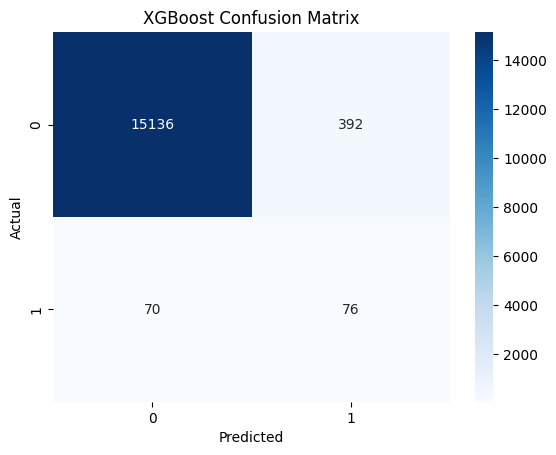

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np # if not already imported
import matplotlib.pyplot as plt # if not already imported
import seaborn as sns # if not already imported

# y_pred_proba_val_xgb contains the predicted probabilities for the positive class on the validation set

# Let's choose a threshold (e.g., 0.5, but this can be tuned)
# For imbalanced classes, the optimal threshold for balancing precision/recall might not be 0.5
# You might explore different thresholds or use precision-recall curves to find a good one.
# For now, let's use 0.5 as an example.
threshold = 0.8
y_pred_class_val_xgb = (y_pred_proba_val_xgb >= threshold).astype(int)

print(f"\nXGBoost Classification Report (Validation Set, threshold={threshold}):")
print(classification_report(y_val, y_pred_class_val_xgb))

print(f"\nXGBoost Confusion Matrix (Validation Set, threshold={threshold}):")
cm = confusion_matrix(y_val, y_pred_class_val_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

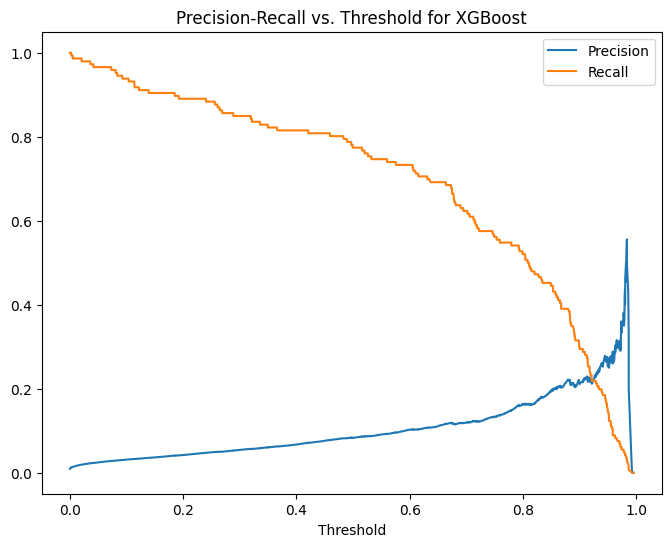

In [53]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba_val_xgb)
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.title("Precision-Recall vs. Threshold for XGBoost")
plt.legend()
plt.show()

In [55]:

import xgboost as xgb # Ensure it's imported

# --- Final Model Training on Entire X_train and y_train ---

# Retrieve the optimal number of boosting rounds from the previously trained model
# This assumes 'xgb_model' is the model object trained in the validation step
try:
    best_n_estimators = xgb_model.best_ntree_limit
    print(f"Using best_ntree_limit from previous early stopping: {best_n_estimators}")
except AttributeError:
    print("Could not retrieve best_ntree_limit. Falling back to original n_estimators or a default.")
    # If xgb_model object or best_ntree_limit is not available,
    # you might fall back to the original n_estimators (e.g., 1000)
    # or a reasonable fixed number if you noted it from the verbose output of early stopping.
    # For this example, let's assume it was 1000 if not found, but ideally you'd use the determined best.
    best_n_estimators = 1000 # Fallback, adjust if you know a better value

# Initialize the final XGBoost model with the determined best_n_estimators
# and other parameters that worked well.
final_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc', # Still good to set, though not used for early stopping if not providing eval_set
    scale_pos_weight=scale_pos_weight_value, # From previous calculation
    use_label_encoder=False,
    random_state=42,
    n_estimators=best_n_estimators, # Use the optimal number of trees
    learning_rate=0.05, # Or other tuned value
    max_depth=3,        # Or other tuned value
    n_jobs=-1
    # Note: We are NOT providing early_stopping_rounds here because we're training for a fixed n_estimators
)

print("\nTraining final XGBoost model on the entire X_train dataset...")
final_xgb_model.fit(X_train, y_train, verbose=True) # Train on full X_train, y_train

print("\nFinal XGBoost model training complete.")

Could not retrieve best_ntree_limit. Falling back to original n_estimators or a default.

Training final XGBoost model on the entire X_train dataset...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:23:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Final XGBoost model training complete.


In [56]:
# Ensure final_xgb_model is your trained model and X_test is your prepared test feature set

print("\nMaking predictions on the test set (X_test)...")

y_pred_proba_test = final_xgb_model.predict_proba(X_test)[:, 1]

print("Predictions generated.")
print(f"Shape of test predictions: {y_pred_proba_test.shape}") # Should match number of rows in X_test
print("Sample test predictions (probabilities):")
print(y_pred_proba_test[:10]) # Print the first 10 predicted probabilities


Making predictions on the test set (X_test)...
Predictions generated.
Shape of test predictions: (50226,)
Sample test predictions (probabilities):
[0.17568552 0.00392505 0.09971949 0.00037167 0.00169537 0.00268248
 0.01837456 0.0105133  0.00577067 0.01216658]


In [58]:

chosen_threshold = 0.3
print(f"Using threshold: {chosen_threshold} to convert probabilities to binary 0/1.")


binary_predictions_test = (y_pred_proba_test >= chosen_threshold).astype(int)

print(f"\nValue counts for binary predictions on the test set:")
print(pd.Series(binary_predictions_test).value_counts(normalize=True)) # See the proportion


submission_df_final_binary = pd.DataFrame({
    'id': test_ids,
    'redemption_status': binary_predictions_test
})

print("\nSample of the final binary submission DataFrame:")
print(submission_df_final_binary.head())

# Define the submission filename
final_submission_filename = 'final_submission_binary.csv'

# Save to CSV
submission_df_final_binary.to_csv(final_submission_filename, index=False)

print(f"\nFinal binary submission file '{final_submission_filename}' created successfully.")
print(f"It contains {len(submission_df_final_binary)} predictions.")

Using threshold: 0.3 to convert probabilities to binary 0/1.

Value counts for binary predictions on the test set:
0    0.976387
1    0.023613
Name: proportion, dtype: float64

Sample of the final binary submission DataFrame:
       id  redemption_status
78369   3                  0
78370   4                  0
78371   5                  0
78372   8                  0
78373  10                  0

Final binary submission file 'final_submission_binary.csv' created successfully.
It contains 50226 predictions.


In [63]:
from sklearn.metrics import roc_auc_score
import pandas as pd

y_pred_proba_on_full_train = final_xgb_model.predict_proba(X_train)[:, 1]

training_auc = roc_auc_score(y_train, y_pred_proba_on_full_train)

print(f"\nTraining AUC for the final_xgb_model (on full X_train data): {training_auc:.4f}")
print(f"For reference, validation AUC was: 0.9308")

if training_auc > 0.999:
    print("Note: A training AUC very close to 1.0 might indicate the model has learned the training data very well,")
    print("possibly to the point of memorization if not for regularization and early stopping informing n_estimators.")
    print("Always prioritize the validation AUC for assessing generalization performance.")


Training AUC for the final_xgb_model (on full X_train data): 0.9860
For reference, validation AUC was: 0.9308
